# Tutorial 1

## 1. Install and configure your environment

On Windows machine, press "Windows" key, type "anaconda powershell

- Linux and Mac: use forward slash "/"
- Windows uses backslash "\"

```
# Create a directory for our project
cd ~
mkdir -p workspace/761
cd ./workspace/761

# Create a new virtual environment
conda env list
conda create --name venv
conda activate venv
# "-n" for name, "-c" for channel
conda install -n venv -c conda-forge numpy sklearn matplotlib jupyterlab pandas

# Check the python version and packages
python --version
python -m pip list
```


In [1]:
import os

import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
# Reload local python files every 2 seconds

%load_ext autoreload
%autoreload 2

## 2. Basic controls

- shift: code completion
- shift + tab: tooltip
- shift + enter: Execute current cell
- ctrl + /: comment or uncomment
- A: add cell Above
- B: add cell Below
- M: Change to Markdown mode
- DD: Delete current cell
- ctrl + i: Open tooltip tab

Tooltips are disabled when the Python script is executing.

## 3. Let's start with a simple Support Vector Machine

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape, y.shape)

(150, 4) (150,)


In [4]:
RANDOM_STATE = 1234
np.random.seed(RANDOM_STATE)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [6]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [7]:
score = model.score(X_train, y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = model.score(X_test, y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 95.83%
Accuracy on test set: 100.00%


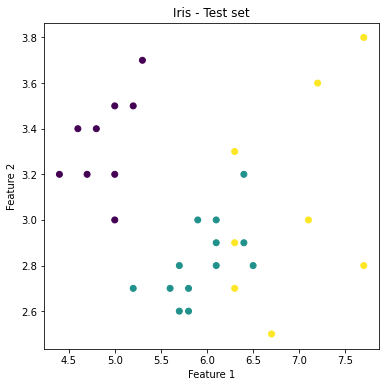

In [8]:
pred = model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Iris - Test set')
plt.show()

## 4. Save and load results

In [9]:
if not os.path.exists('results'):
    os.mkdir('results')

In [10]:
path = os.path.join('results', 'pred_test.npy')
np.save(path, pred)

In [11]:
data = np.load(path)
print(data)

[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]


In [12]:
np.all(data == pred)

True

## 5. Load data using Pandas

Download data from: https://archive.ics.uci.edu/ml/datasets/Yeast

In [13]:
import pandas as pd
from pandas.api.types import CategoricalDtype

In [14]:
PATH_YEAST = os.path.join('data', 'yeast.data')
print(PATH_YEAST)

data\yeast.data


In [15]:
COLUMN_NAMES = ['Sequence', 'Mcg', 'Gvh', 'Alm', 'Mit', 'Erl', 'Pox', 'Vac', 'Nuc', 'Class']
yeast = pd.read_csv(PATH_YEAST, sep='\s+', names=COLUMN_NAMES, header=None)
yeast.head()

,Sequence,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [16]:
# We don't need 1st column, let's drop it.
yeast = yeast.drop(['Sequence'], axis=1)
yeast.head()

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [17]:
# Find how many output classes are in the dataset.
classes = yeast['Class'].unique()
classes

array(['MIT', 'NUC', 'CYT', 'ME1', 'EXC', 'ME2', 'ME3', 'VAC', 'POX',
       'ERL'], dtype=object)

In [18]:
# Replace text categorical data to integers.
yeast_types = CategoricalDtype(categories=classes)
yeast['Class'] = yeast['Class'].astype(yeast_types).cat.codes.astype('long')
yeast.head()

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,0
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,0
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,0
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,1
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,0


In [19]:
# Be careful of type conversion. There will be rounding error when convert from float64 to float32.
yeast['Mcg']

0       0.58
1       0.43
2       0.64
3       0.58
4       0.42
        ... 
1479    0.81
1480    0.47
1481    0.67
1482    0.43
1483    0.65
Name: Mcg, Length: 1484, dtype: float64

In [20]:
PATH_YEAST_CLEAN = os.path.join('results', 'yeast.csv')
yeast.to_csv(PATH_YEAST_CLEAN, index=False)

In [21]:
# Split data 
y = yeast['Class'].to_numpy()
X = yeast.drop(['Class'], axis=1).to_numpy()

print(X.shape, y.shape)

(1484, 8) (1484,)


In [22]:
n_features = X.shape[1]
n_classes = len(np.unique(y))
print(n_features, n_classes)

8 10


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape)

(1187, 8) (297, 8)


In [24]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [25]:
score = model.score(X_train, y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = model.score(X_test, y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 61.67%
Accuracy on test set: 61.95%


## 6. Another example on loading data

Donwload the zip file from: https://sci2s.ugr.es/keel/dataset.php?cod=112

In [26]:
PATH_YEAST = os.path.join('data', 'yeast', 'yeast.dat')
COLUMN_NAMES = ['Mcg', 'Gvh', 'Alm', 'Mit', 'Erl', 'Pox', 'Vac', 'Nuc', 'Class']
yeast = pd.read_csv(PATH_YEAST, sep=',', names=COLUMN_NAMES, header=None, skiprows=13)
yeast.head()

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [27]:
# If the data type is not string, then you have loaded the csv file correctly.
yeast['Mcg']

0       0.58
1       0.43
2       0.64
3       0.58
4       0.42
        ... 
1479    0.82
1480    0.35
1481    0.41
1482    0.51
1483    0.67
Name: Mcg, Length: 1484, dtype: float64